# What is xarray?
Designed to be run on 7 cores on gadi. Needs access to rt52 and fs38

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

## xarray labels stuff

In [10]:
tas = xr.open_dataset('/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/latest/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc')
tas

<xarray.Dataset> Size: 221MB
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 220MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  87658.0
    creation_date:          2020-06-05T04:06:11Z
    ...                     ...
    variable_id:            tas
    variant_label:          r10i1p1f1
    version:                v20200605
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f29eb467cd1

In [11]:
tas.tas.mean('time')

<xarray.DataArray 'tas' (lat: 145, lon: 192)> Size: 111kB
array([[225.135  , 225.135  , 225.135  , ..., 225.135  , 225.135  ,
        225.135  ],
       [228.2093 , 228.17036, 228.13187, ..., 228.32584, 228.28758,
        228.24892],
       [229.03134, 228.91927, 228.81047, ..., 229.38257, 229.26399,
        229.1471 ],
       ...,
       [254.93915, 254.97498, 255.0106 , ..., 254.82315, 254.86607,
        254.9018 ],
       [254.64241, 254.65715, 254.67108, ..., 254.59578, 254.60938,
        254.62605],
       [254.07645, 254.07645, 254.07645, ..., 254.07645, 254.07645,
        254.07645]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B ...

### xarray is a wrapper for a numpy or dask array

In [12]:
np_array = np.round(np.sin(np.linspace(0,2*np.pi,12)),2)
np_array


array([ 0.  ,  0.54,  0.91,  0.99,  0.76,  0.28, -0.28, -0.76, -0.99,
       -0.91, -0.54, -0.  ])

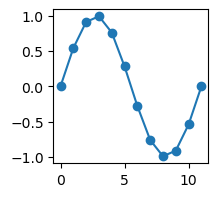

In [13]:
plt.figure(figsize=(2,2))
plt.plot(np_array,marker='o')

In [14]:
# xarray wrapped around numpy
xr_array = xr.DataArray(np_array,
                        dims=('time',),
                        coords={'time':np.arange(1,13,dtype=int)})
xr_array

<xarray.DataArray (time: 12)> Size: 96B
array([ 0.  ,  0.54,  0.91,  0.99,  0.76,  0.28, -0.28, -0.76, -0.99,
       -0.91, -0.54, -0.  ])
Coordinates:
  * time     (time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [15]:
# xarray wrapped around dask
xr_array_dask = xr_array.chunk({'time':3})
xr_array_dask

<xarray.DataArray (time: 12)> Size: 96B
dask.array<xarray-<this-array>, shape=(12,), dtype=float64, chunksize=(3,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

## What's dask do?

In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1,memory_limit=0)
client.amm.start()
client

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42387 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42387/status,
Dashboard: /proxy/42387/status,Workers: 7
Total threads: 7,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39453,Workers: 0
Dashboard: /proxy/42387/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45779,Total threads: 1
Dashboard: /proxy/37883/status,Memory: 0 B
Nanny: tcp://127.0.0.1:37885,


In [17]:
xr_array.mean('time')

<xarray.DataArray ()> Size: 8B
array(2.77555756e-17)

In [18]:
xr_array_dask.mean('time')

<xarray.DataArray ()> Size: 8B
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

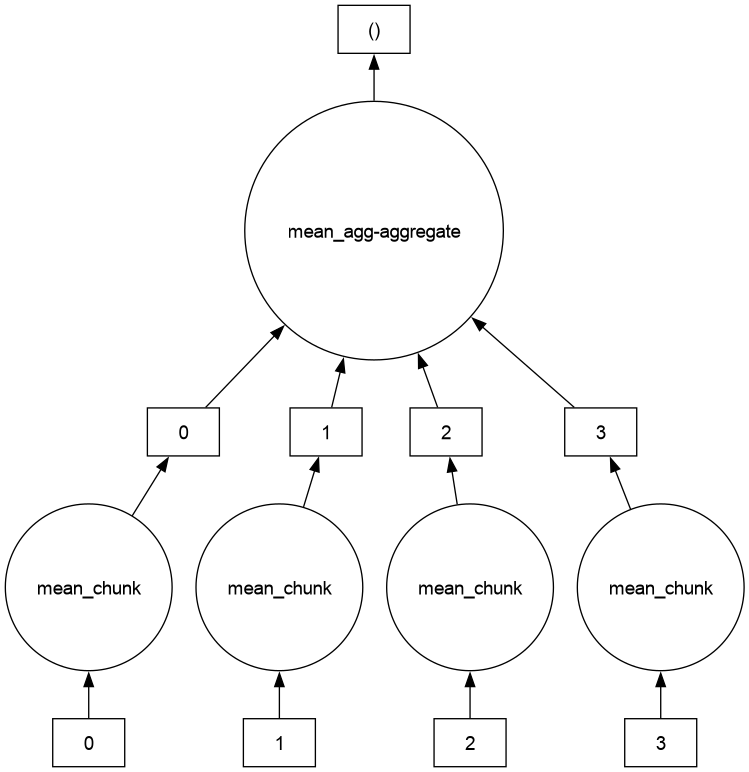

In [19]:
xr_array_dask.mean('time').data.visualize()

In [21]:
xr_array_dask.mean('time').load()

<xarray.DataArray ()> Size: 8B
array(0.)